In [ ]:
#!nvidia-smi

Wed Oct 19 19:32:00 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22,10

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(x_train,y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
import matplotlib.pyplot as plt

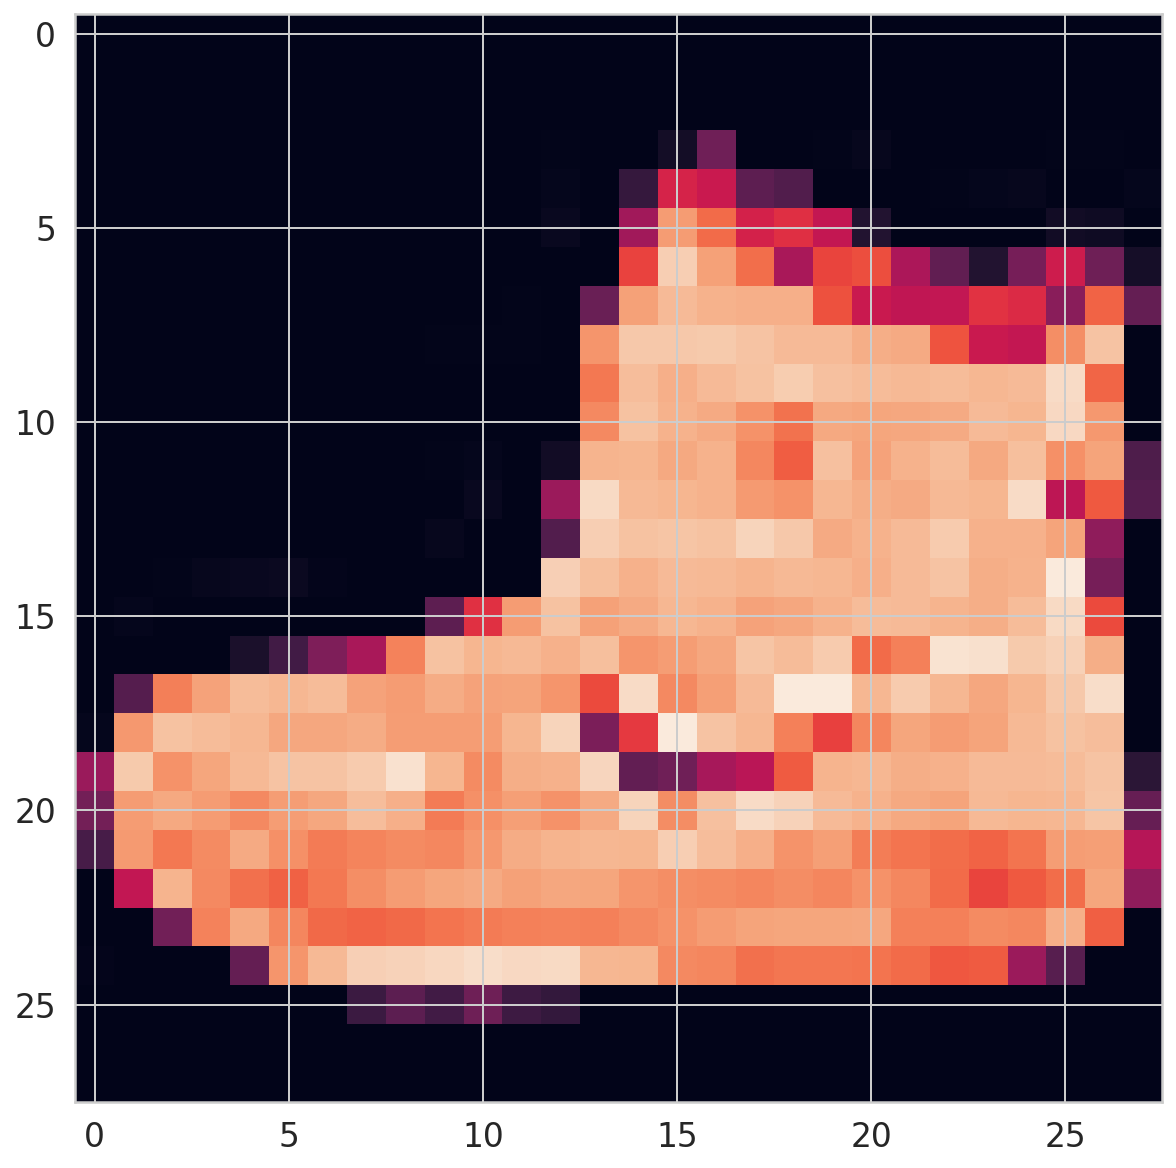

In [ ]:
plt.imshow(x_train[0])

In [ ]:
y_train[0]

9

In [ ]:
# Preprocessing the data

In [ ]:
x_train.max()

255

In [ ]:
x_train = x_train/255

In [ ]:
x_test = x_test/255

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
y_cat_train = to_categorical(y_train)

In [ ]:
y_cat_test = to_categorical(y_test)

#Building the Model
1, 2D Convolution Layer, filters=32 and keras_size=(4,4)
2, Pooling Layer of size (2,2)
3, Flatten Layer
4, Dense Layer 128 Neurons, RELU activation function 
5, Final Dense Layer of 10 Neurons with a softmax activation 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()
#Convolutional Layer 
model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (28, 28, 1), activation = 'relu'))
#Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))
#Flatten images from 28 by 28 to 764 before final layer
model.add(Flatten())
# 128 neurons in dense hidden layer 
model.add(Dense(128, activation ='relu'))
# neurons last layer is the classifier, thus 10 possible classes 
model.add(Dense(10, activation ='softmax'))
model.compile(loss='categorical_crossentropy', optimizer ='rmsprop', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

In [ ]:
model.fit(x_train, y_cat_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2751 - accuracy: 0.9010
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2370 - accuracy: 0.9141
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2100 - accuracy: 0.9247
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1923 - accuracy: 0.9324
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1767 - accuracy: 0.9374


In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.2978 - accuracy: 0.9086


[0.2978171706199646, 0.9085999727249146]

In [ ]:
#classficiation report 
#predictions (prediction method of the model)
#print classification report (precision, recall, f1-score, support)

In [ ]:
# why is f1 score more reliable than accuracy in industry ? 
# how can I interpret a classifciation report ? --> Precision & recall --> sensitivity 